<center> <img src="https://mecatron.org.br/wp-content/uploads/2020/05/mecatron-logo-v3-1-e1589482286353.png" style="width: 100px;">

# Fourier Transform Analysis

We need to engineer a filtering algorithm to remove unwanted noise from our system, but first wee need to gather the necessary data and do a Fourirer Transform, to inspect the data in the frequency domain.

## Loading Test Data 

First we need to load the csv data colected during the real world scenario:

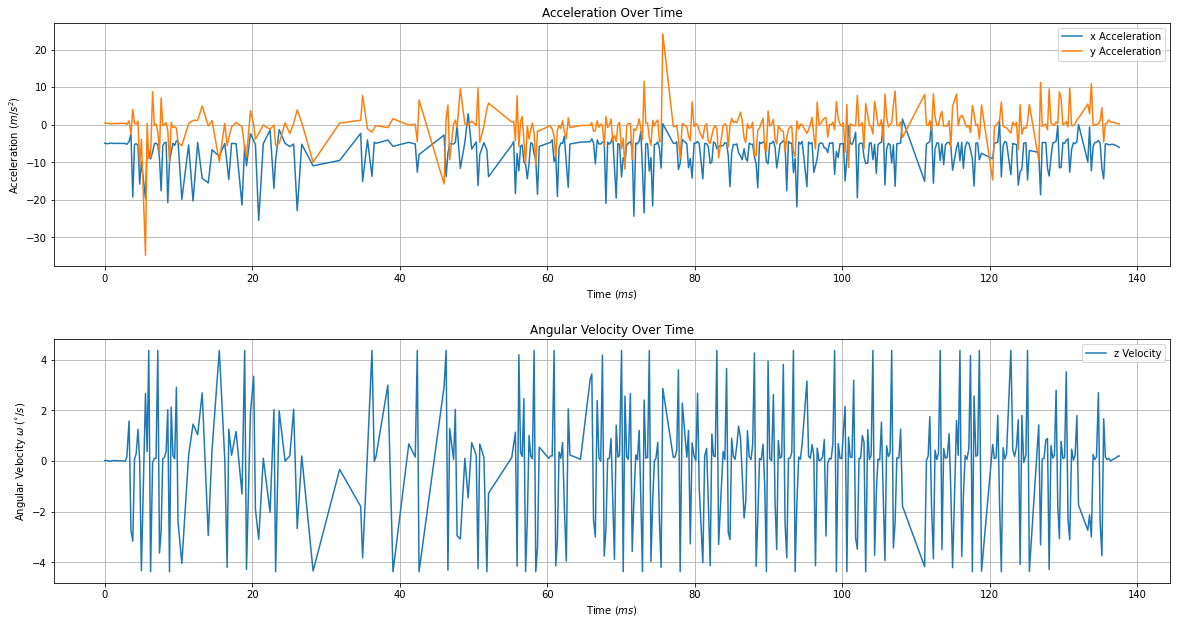

In [46]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

# Read the csv file containing the tests data
raw_data = pd.read_csv('log_file.csv')

# Now that we have loaded the data, we can transform it into  np arrays, since we will be applying FFT to them 
time_axis = raw_data['Time'].to_numpy()
x_acceleration = raw_data['x Acceleration'].to_numpy()
y_acceleration = raw_data['y Acceleration'].to_numpy()
z_velocity = raw_data['z Velocity'].to_numpy()

# One thing we can do to make vizualizantion easier is to plot relative time in s rather than the time since the epoche 
time_axis -= time_axis[0]

# Now we can vizualize the raw data 
fig, ax = plt.subplots(2, 1, figsize=(20,10.3))
ax[0].plot(time_axis,x_acceleration, label = 'x Acceleration')
ax[0].plot(time_axis,y_acceleration, label = 'y Acceleration')
ax[1].plot(time_axis,z_velocity,     label = 'z Velocity')

ax[0].set_title('Acceleration Over Time')
ax[0].set_xlabel('Time ($ms$)')
ax[0].set_ylabel(r'Acceleration ($m/s^{2}$)')

ax[1].set_title('Angular Velocity Over Time')
ax[1].set_xlabel('Time ($ms$)')
ax[1].set_ylabel(r'Angular Velocity $\omega$ ($^{\circ}/s$)')


ax[0].legend()
ax[1].legend()

ax[0].grid()
ax[1].grid()

plt.subplots_adjust(hspace=.3)
plt.show()


## Fourier Transform 

### Determine Data Propreties
Before we apply the Fourier transform, we first need to determine the $sample \ rante$ and the $duration$ of the data:

$$\boxed{ duration = (final \ time - initial \ time)s }$$
$$\boxed{ sample \ rate  = \frac{number \ of \ data \ points}{duration} Hz} $$

In [56]:
duration = (time_axis[-1] - time_axis[0])
sample_rate = len(x_acceleration) / duration

print('Duration of the data in secods:', duration)
print('Data rate:', sample_rate)

Duration of the data in secods: 137.58648300170898
Data rate: 2.8636534011491963


### Apply the Transform

Now we can use the tools in the scipy package to apply the fourrier transform and plot it afterwords 

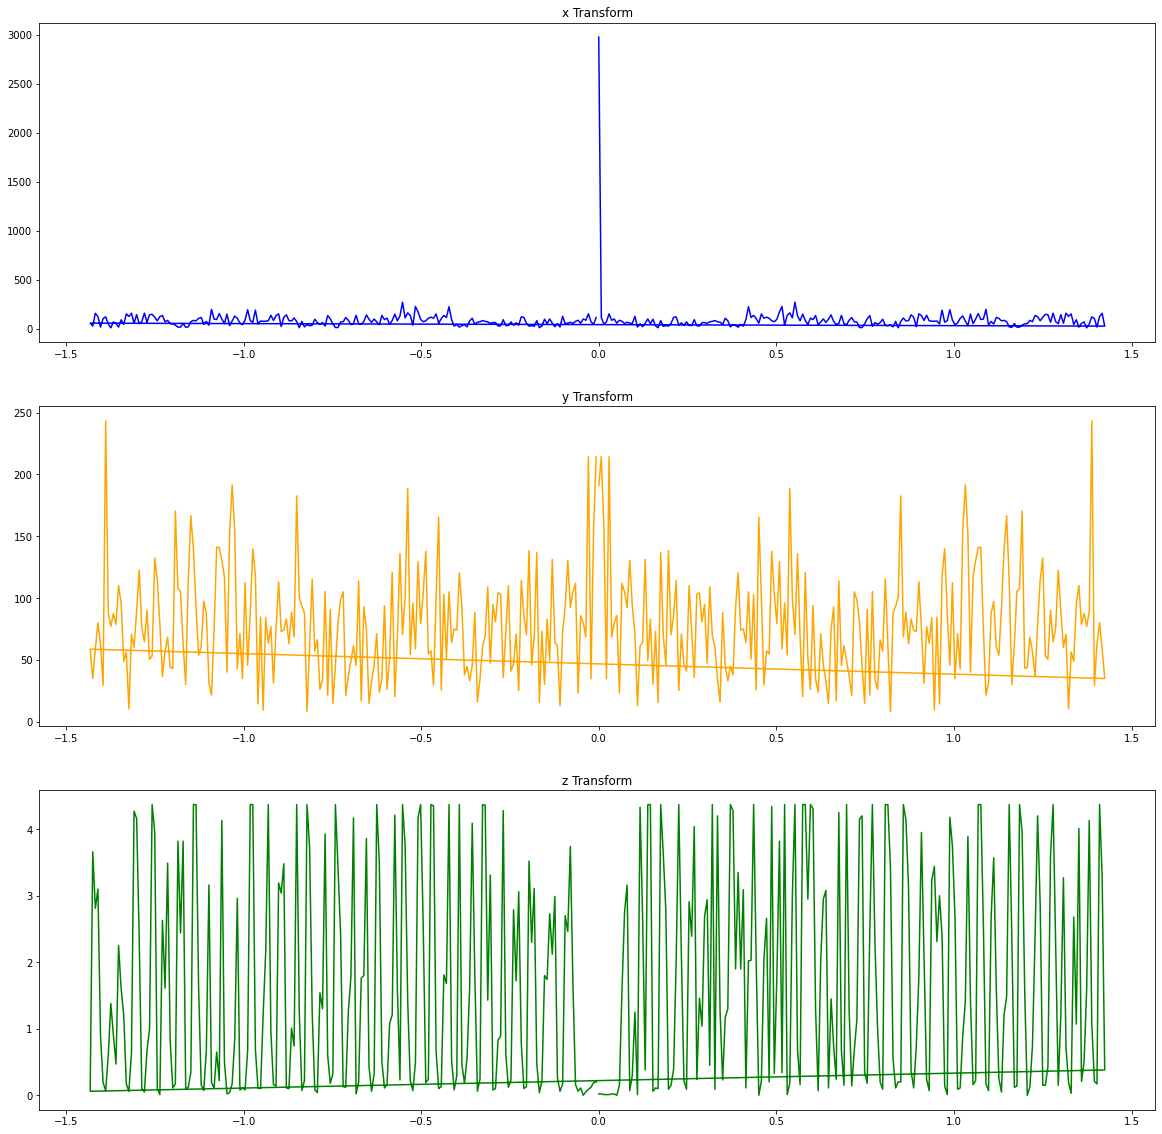

In [71]:
from scipy.fft import fft, fftfreq

# Get the number of data points, since all 3 data sources were logged together, they all have the same sample rate, duration and number of elements
n_data_points = len(x_acceleration)

# Now we will apply the transform for each data array 
x_acceleration_transform = fft(x_acceleration)
y_acceleration_transform = fft(y_acceleration)
z_velocity_transform = fft(z_velocity)

xf = fftfreq(n_data_points, 1/sample_rate)

# Plot the transformations 
fig, plots = plt.subplots(3,1, figsize = (20,20))

plots[0].set_title('x Transform')
plots[0].plot(xf, np.abs(x_acceleration_transform), 'blue')

plots[1].set_title('y Transform')
plots[1].plot(xf, np.abs(y_acceleration_transform), 'orange')

plots[2].set_title('z Transform')
plots[2].plot(xf, np.abs(z_velocity), 'green')


plt.show()